In [1]:
import sys, os
import matplotlib
import cartopy
import xarray as xr

In [2]:
%matplotlib inline

# get a reader for the uniform grid
# 

In [3]:
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_ROMS_native, reader_timeseries

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

np.random.seed(983214)

In [4]:
fjordos_geo = xr.open_dataset("https://thredds.met.no/thredds/dodsC/fjordos/geogrid_tmp/test_polstere_1h_0007.nc")
fjordos_geo

<xarray.Dataset>
Dimensions:     (ocean_time: 720, s_rho: 42, s_w: 43, eta_rho: 741,
                 xi_rho: 397, xi_u: 396, eta_v: 740)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2014-06-30T13:00:00 ... 2014-07-3...
  * s_rho       (s_rho) float64 -0.9881 -0.9643 -0.9405 ... -0.03571 -0.0119
  * s_w         (s_w) float64 -1.0 -0.9762 -0.9524 ... -0.04762 -0.02381 0.0
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v
Data variables: (12/17)
    projection  int32 ...
    Cs_r        (s_rho) float64 ...
    Cs_w        (s_w) float64 ...
    h           (eta_rho, xi_rho) float32 ...
    mask_rho    (eta_rho, xi_rho) float32 ...
    angle       (eta_rho, xi_rho) float32 ...
    ...          ...
    u           (ocean_time, s_rho, eta_rho, xi_u) float32 ...
    v           (ocean_time, s_rho, eta_v, xi_rho) float32 ...
    Uwind       (ocean_time, eta_rho, xi_rho) float32 ...
    Vwind       (ocean_time, eta_rho, xi_rho) float32 ...
    lat_rho     (eta_rho, xi_rho) float32 ...
    lon_rho     (eta_rho, xi_rho) float32 ...
Attributes:
    DODS_EXTRA.Unlimited_Dimension:  ocean_time

In [5]:
fjordos = xr.open_dataset("/lustre/storeB/project/fou/hi/FjordOs/fjordos2_hindcast/v6/exp1/ocean_his_0007.nc4")
fjordos

<xarray.Dataset>
Dimensions:         (ocean_time: 720, s_w: 43, eta_rho: 899, xi_rho: 299,
                     tracer: 2, s_rho: 42, boundary: 4, eta_psi: 898,
                     xi_psi: 298, eta_u: 899, xi_u: 298, eta_v: 898, xi_v: 299)
Coordinates:
    lat_psi         (eta_psi, xi_psi) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lon_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2014-06-30T13:00:00 ... 2014-...
  * s_rho           (s_rho) float64 -0.9881 -0.9643 -0.9405 ... -0.03571 -0.0119
  * s_w             (s_w) float64 -1.0 -0.9762 -0.9524 ... -0.04762 -0.02381 0.0
Dimensions without coordinates: eta_rho, xi_rho, tracer, boundary, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/99)
    AKt             (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    AKv             (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    Akk_bak         float64 ...
    Akp_bak         float64 ...
    Akt_bak         (tracer) float64 ...
    Akv_bak         float64 ...
    ...              ...
    v               (ocean_time, s_rho, eta_v, xi_v) float32 ...
    v_northward     (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    vbar            (ocean_time, eta_v, xi_v) float32 ...
    w               (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    xl              float64 ...
    zeta            (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/33)
    file:              /lustre/storeB/users/nilsmk/metroms_run/fjordos_hindca...
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             ROMS
    var_info:          /home/nilsmk/metroms_apps/fjordos_hindcast/include/var...
    ...                ...
    compiler_flags:    -xHost  -free -free
    tiling:            004x036
    history:           Wed Jan 22 16:28:40 2020: ncks -O --4 -L 3 ocean_his_0...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       FJORDOS, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    NCO:               netCDF Operators version 4.8.0 (Homepage = http://nco....

In [6]:
o = OceanDrift(loglevel=50)

print(o)

Model:	OceanDrift     (OpenDrift version 1.10.6)
	0 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
Readers not added for the following variables:
  land_binary_mask
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_floor_depth_below_sea_level
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_period_at_variance_spectral_density_maximum
  sea_surface_wave_significant_height
  sea_surface_wave_stokes_drift_x_velocity
  sea_surface_wave_stokes_drift_y_velocity
  surface_downward_x_stress
  surface_downward_y_stress
  turbulent_generic_length_scale
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind



In [7]:
#norkyst_model_input_files = [
#                "https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072100.nc"
#            ]

fjordos_model_input_files = [
                "/lustre/storeB/project/fou/hi/FjordOs/fjordos2_hindcast/v6/exp1/ocean_his_0007.nc4"
            ]
#                "https://thredds.met.no/thredds/dodsC/fjordos/fjordos2_hindcast/v6/exp1/ocean_his_0007.nc4"
#            ]

reader = reader_ROMS_native.Reader(fjordos_model_input_files)
print(reader)

Reader: roms native
Projection: 
  None
Coverage: [pixels]
  xmin: 0.000000   xmax: 298.000000   step: 1   numx: 299
  ymin: 0.000000   ymax: 898.000000   step: 1   numy: 899
  Corners (lon, lat):
    ( 10.49,  59.91)  ( 10.82,  59.93)
    ( 10.00,  58.97)  ( 11.20,  58.97)
Vertical levels [sigma]: 
  [-0.98809524 -0.96428571 -0.94047619 -0.91666667 -0.89285714 -0.86904762
 -0.8452381  -0.82142857 -0.79761905 -0.77380952 -0.75       -0.72619048
 -0.70238095 -0.67857143 -0.6547619  -0.63095238 -0.60714286 -0.58333333
 -0.55952381 -0.53571429 -0.51190476 -0.48809524 -0.46428571 -0.44047619
 -0.41666667 -0.39285714 -0.36904762 -0.3452381  -0.32142857 -0.29761905
 -0.27380952 -0.25       -0.22619048 -0.20238095 -0.17857143 -0.1547619
 -0.13095238 -0.10714286 -0.08333333 -0.05952381 -0.03571429 -0.01190476]
Available time range:
  start: 2014-06-30 13:00:00   end: 2014-07-30 12:00:00   step: 1:00:00
    720 times (0 missing)
Variables:
  x_wind
  y_wind
  sea_floor_depth_below_sea_level
  l

In [8]:
# reader.plot()

In [9]:
import pickle

with open("fjordos_opendrift_wind.pickle", "rb") as f:
    opendrift_wind = pickle.load(f)

In [10]:
print(opendrift_wind)
wind_reader = reader_timeseries.Reader(opendrift_wind)

{'time': [datetime.datetime(2014, 7, 5, 13, 0), datetime.datetime(2014, 7, 5, 14, 0), datetime.datetime(2014, 7, 5, 15, 0), datetime.datetime(2014, 7, 5, 16, 0), datetime.datetime(2014, 7, 5, 17, 0), datetime.datetime(2014, 7, 5, 18, 0), datetime.datetime(2014, 7, 5, 19, 0)], 'x_wind': [2.7488036155700684, 4.322264194488525, 5.739902973175049, 6.720940113067627, 7.071067810058594, 6.720940113067627, 5.739902973175049], 'y_wind': [2.7488036155700684, 4.322264194488525, 5.739902973175049, 6.720940113067627, 7.071067810058594, 6.720940113067627, 5.739902973175049]}


In [11]:
o.add_reader(reader)
# o.add_reader([wind_reader, reader])
# o.add_reader([reader], variables=['x_wind', 'y_wind'])

In [12]:
print("First available timestep in reader: {}".format(reader.start_time))
print("Last available timestep in reader: {}".format(reader.end_time))

sim_start_time_index = 5*24 +20
sim_end_time_index = sim_start_time_index + 6

sim_start_time = reader.times[sim_start_time_index]
sim_end_time = reader.times[sim_end_time_index]

print("First timestep of simulation: {}".format(sim_start_time))
print("Last timestep of simulation: {}".format(sim_end_time))

First available timestep in reader: 2014-06-30 13:00:00
Last available timestep in reader: 2014-07-30 12:00:00
First timestep of simulation: 2014-07-06 09:00:00
Last timestep of simulation: 2014-07-06 15:00:00


In [13]:
# random seeding in the middle of the inner Oslofjord
#o.seed_elements(lon=10.55, lat=59.80, number=10, radius=500,
#                    time=sim_start_time)


seed_points_lats = [59.78606414794922,
                  59.70504665374756,
                  59.74572563171387,
                  59.875346183776855,
                  59.821105003356934,
                  59.81318473815918]

seed_points_lons = [10.554881572723389,
                  10.58893370628357,
                  10.536277055740356,
                  10.664061546325684,
                  10.716439247131348,
                  10.519662380218506]

n_seeds = len(seed_points_lats)

windage_factor = 0.030

o.seed_elements(lat=seed_points_lats, lon=seed_points_lons, 
                time=sim_start_time, 
                #wind_drift_factor=np.zeros_like(seed_points_lats))
                wind_drift_factor=np.ones_like(seed_points_lats)*windage_factor)

In [14]:
print(o)

Model:	OceanDrift     (OpenDrift version 1.10.6)
	0 active Lagrangian3DArray particles  (0 deactivated, 6 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
  sea_floor_depth_below_sea_level
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind
     1) roms native
  -----
Readers not added for the following variables:
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_period_at_variance_spectral_density_maximum
  sea_surface_wave_significant_height
  sea_surface_wave_stokes_drift_x_velocity
  sea_surface_wave_stokes_drift_y_velocity
  surface_downward_x_stress
  surface_downward_y_stress
  turbulent_generic_length_scale



In [15]:
# 1 Full config <-- list_configspec() should contain all parameters
# 2 OceanDrift or Leeway <-- latter is made for SAR
# 3 Stokes drift (waves + wind) <-- parameterized in Leeway (but can turn it off), needs waves in OceanDrift

# 4 Args for seed_elements (are drifters at the surface?) <-- default is seeding at the surface 
#  (but option for seeding in prescribed depths, see https://opendrift.github.io/tutorial.html#seeding-elements)
# 5 Wind - uniform magnitude & uniform direction <--- see 
#  https://opendrift.github.io/gallery/example_constant_current.html#sphx-glr-gallery-example-constant-current-py (for x_wind and y_wind)

#print(o.list_config())
print(o.list_configspec())

general:use_auto_landmask           [True] bool   A built-in GSHHG glo...
general:coastline_action            [stranding] enum  ['none', 'stranding', 'previous'] None means that obje...
general:time_step_minutes           [60] float min: 0.01, max: 1440 [minutes] Calculation time ste...
general:time_step_output_minutes    [None] float min: 1, max: 1440 [minutes] Output time step, i....
seed:ocean_only                     [True] bool   If True, elements se...
seed:number                         [1] int   min: 1, max: 100000000 [1] The number of elemen...
drift:max_age_seconds               [None] float min: 0, max: inf [seconds] Elements will be dea...
drift:advection_scheme              [euler] enum  ['euler', 'runge-kutta', 'runge-kutta4'] Numerical advection ...
drift:current_uncertainty           [0] float min: 0, max: 5 [m/s] Add gaussian perturb...
drift:current_uncertainty_uniform   [0] float min: 0, max: 5 [m/s] Add gaussian perturb...
drift:horizontal_diffusivity        [0] flo

In [16]:
#o.run(end_time=sim_end_time, time_step=60, time_step_output=60, outfile='opendrift.nc') # sim & dump every minute
o.run(end_time=sim_end_time, time_step=600, time_step_output=600, outfile='opendrift.nc') # sim & dump every 10 minutes

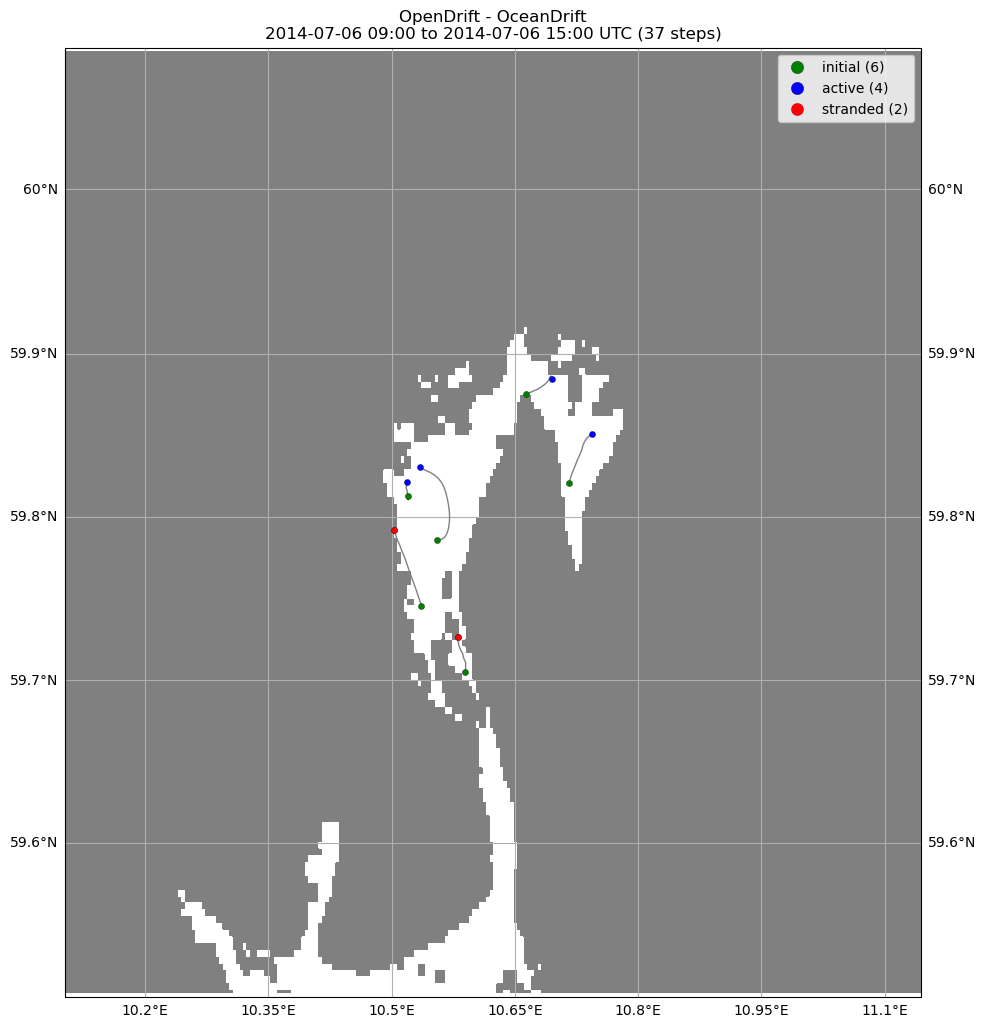

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2014-07-06 09:00 to 2014-07-06 15:00 UTC (37 steps)'}>,
 <Figure size 991.133x1100 with 1 Axes>)

In [17]:
o.plot(fast=True)

In [18]:
print(o)

--------------------
Reader performance:
--------------------
roms native
 0:00:10.1  total
 0:00:00.0  preparing
 0:00:09.7  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
 0:00:00.3  rotating vectors
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
Performance:
   19.5 total time
    4.2 configuration
    4.5 preparing main loop
      4.5 making dynamical landmask
      0.0 moving elements to ocean
     10.5 readers
        0.0 global_landmask
        0.1 postprocessing
   10.6 main loop
       10.3 roms native
      0.0 updating elements
    0.1 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.10.6)
	4 active Lagrangian3DArray particles  (2 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  sea_floor_depth_below_sea_level
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  x_w

In [19]:
print(len(o.get_lonlats()))
print(o.get_lonlats()[0].shape) # (n_drifters, n_timesteps)

print(o.get_lonlats()[0][0]) # lons for drifter 0
print(o.get_lonlats()[1][0]) # lats for drifter 0

print(o.get_time_array()[0]) # list of times (datetime)

print(reader.lonlat2xy(o.get_lonlats()[0][0], o.get_lonlats()[1][0]))

2
(6, 37)
[10.554882049560547 10.557501792907715 10.559906959533691
 10.562084197998047 10.564029693603516 10.565730094909668
 10.567200660705566 10.56844425201416 10.569356918334961 10.56997013092041
 10.570402145385742 10.570571899414062 10.570423126220703
 10.569867134094238 10.569178581237793 10.568283081054688
 10.567119598388672 10.565823554992676 10.56452751159668
 10.563095092773438 10.5614013671875 10.559612274169922 10.557820320129395
 10.556035041809082 10.554204940795898 10.552267074584961
 10.550313949584961 10.548487663269043 10.546717643737793
 10.545045852661133 10.543455123901367 10.54184627532959
 10.540230751037598 10.538657188415527 10.53712272644043
 10.535639762878418 10.534217834472656]
[59.78606414794922 59.7861213684082 59.7863883972168 59.78687286376953
 59.78757858276367 59.78858184814453 59.78995895385742 59.791690826416016
 59.79358673095703 59.79558563232422 59.7977294921875 59.80008316040039
 59.80255889892578 59.805076599121094 59.80765151977539 59.81023

In [20]:
time = o.get_time_array()[0]

lon = o.get_lonlats()[0]
lat = o.get_lonlats()[1]

x = []
y = []
for i in range(n_seeds):
    x_i, y_i = reader.lonlat2xy(o.get_lonlats()[0][i], o.get_lonlats()[1][i])
    x.append(x_i.tolist())
    y.append(y_i.tolist())

opendrift_results = {
                    "time": o.get_time_array()[0], # -> [time_index]
                    "lon": lon, # -> [drifter_index][time_index]
                    "lat": lat, # -> [drifter_index][time_index]
                    "x": x,     # -> [drifter_index][time_index]
                    "y": y,     # -> [drifter_index][time_index]
                    }

print(opendrift_results)

{'time': [datetime.datetime(2014, 7, 6, 9, 0), datetime.datetime(2014, 7, 6, 9, 10), datetime.datetime(2014, 7, 6, 9, 20), datetime.datetime(2014, 7, 6, 9, 30), datetime.datetime(2014, 7, 6, 9, 40), datetime.datetime(2014, 7, 6, 9, 50), datetime.datetime(2014, 7, 6, 10, 0), datetime.datetime(2014, 7, 6, 10, 10), datetime.datetime(2014, 7, 6, 10, 20), datetime.datetime(2014, 7, 6, 10, 30), datetime.datetime(2014, 7, 6, 10, 40), datetime.datetime(2014, 7, 6, 10, 50), datetime.datetime(2014, 7, 6, 11, 0), datetime.datetime(2014, 7, 6, 11, 10), datetime.datetime(2014, 7, 6, 11, 20), datetime.datetime(2014, 7, 6, 11, 30), datetime.datetime(2014, 7, 6, 11, 40), datetime.datetime(2014, 7, 6, 11, 50), datetime.datetime(2014, 7, 6, 12, 0), datetime.datetime(2014, 7, 6, 12, 10), datetime.datetime(2014, 7, 6, 12, 20), datetime.datetime(2014, 7, 6, 12, 30), datetime.datetime(2014, 7, 6, 12, 40), datetime.datetime(2014, 7, 6, 12, 50), datetime.datetime(2014, 7, 6, 13, 0), datetime.datetime(2014, 7,

In [21]:
import pickle

with open("fjordos_opendrift_trajectories_"+"{:.3f}".format(windage_factor)[2:]+".pickle", "wb") as f:
    pickle.dump(opendrift_results, f, protocol=4)

Loading

In [22]:
with open("fjordos_opendrift_trajectories.pickle", "rb") as f:
    opendrift_results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'fjordos_opendrift_trajectories.pickle'

In [ ]:
print(opendrift_results)

# Experiment: Reading wind from timeseries (from generate_wind.ipynb)

In [ ]:
import pickle

with open("fjordos_opendrift_wind.pickle", "rb") as f:
    opendrift_wind = pickle.load(f)

In [ ]:
print(opendrift_wind)
r = reader_timeseries.Reader(opendrift_wind)

In [ ]:
from datetime import datetime, timedelta
from opendrift.models.oceandrift import OceanDrift

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

In [ ]:
o.add_reader([r])

In [ ]:
o.seed_elements(lon=4.0, lat=60.0, radius=5000, number=100,
                time=datetime(2014, 7, 5, 13, 0, 0))

In [ ]:
o.run(duration=timedelta(hours=6))

In [ ]:
o.plot(fast=True, buffer=1)

In [ ]:
print(o)